# Exercise 2: Polynomial regression

Please write here your name and student id: Mariia Chernova 1908135

File dists.csv contains data where each row has data about an experiment where car is stopped from a given speed. Data in the columns is car speed and stopping distance. Target is to create a model with which the stopping distance can be predicted by the speed and the indicator.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from numpy import genfromtxt

Read the data from file 'dists.csv' to numpy array dist_data

In [13]:
dist_data = genfromtxt('dists.csv', delimiter=',', skip_header=1)
#raise NotImplementedError()
print(dist_data.shape)

(20, 2)


In [14]:
assert(dist_data.shape[0] == 20)
assert(dist_data.shape[1] == 2)

Pick to variable x the independent variables and to y the dependent one.

In [29]:
x = dist_data[:,0:1]  
y = dist_data[:,1]
# YOUR CODE HERE
# raise NotImplementedError()

In [30]:
assert(x.shape == (20,1))
assert(y.shape[0] == 20)

Create a scatterplot of the data with speed on x axis, distance on y axis.

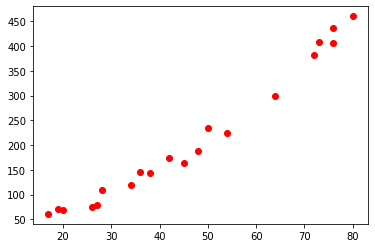

In [31]:
plt.plot(x, y, 'ro')
plt.show()

Scale the data (although not mandatory in this 1-dimensional case)

In [33]:
scaler = preprocessing.StandardScaler().fit(x)
scaled_x = scaler.transform(x)
scaled_x

#raise NotImplementedError()

array([[-0.49944323],
       [-0.20708622],
       [-1.42524043],
       [ 0.08527079],
       [-0.06090771],
       [-0.93797874],
       [-0.98670491],
       [ 0.18272313],
       [-1.27906192],
       [-0.88925258],
       [-0.40199089],
       [ 1.44960351],
       [ 1.44960351],
       [ 1.64450819],
       [ 0.86488949],
       [ 0.37762781],
       [-0.59689556],
       [ 1.30342501],
       [-1.32778809],
       [ 1.25469884]])

In [34]:
eps = 0.001
assert(np.sum(scaled_x.mean(axis=0)) < eps)
assert(np.sum(scaled_x.std(axis=0)) < 1 + eps)

Split the data into training and test sets, with 30% in test set.

In [35]:
np.random.seed(42) # Please do not remove
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3)
#raise NotImplementedError()

In [36]:
assert(x_train.shape == (14,1))
assert(x_test.shape == (6,1))

Create polynomial features for 10th degree polynomial model.

In [38]:
d = 10
poly = PolynomialFeatures(d)
x_train_poly = poly.fit_transform(x_train.reshape(-1,1))
x_test_poly = poly.fit_transform(x_test.reshape(-1,1))

#raise NotImplementedError()

In [39]:
assert(x_train_poly.shape == (14,11))
assert(x_test_poly.shape == (6,11))

In [47]:
model = linear_model.LinearRegression()
model.fit(x_train_poly, y_train)
#raise NotImplementedError()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
assert(np.sum(model.coef_) - 131.58 < eps)

In [49]:
plain_poly_r2_train = model.score(x_train_poly, y_train)
plain_poly_r2_test = model.score(x_test_poly, y_test)
#raise NotImplementedError()
print(plain_poly_r2_train, plain_poly_r2_test)

0.9962023409363848 0.9378221726965915


In [50]:
assert(plain_poly_r2_train - 0.9962 < eps)
assert(plain_poly_r2_test - 0.9378 < eps)

In [54]:
regmodel = linear_model.Ridge(alpha=4.0).fit(x_train_poly, y_train)

reg_poly_r2_train = regmodel.score(x_train_poly, y_train)
reg_poly_r2_test = regmodel.score(x_test_poly, y_test)

# YOUR CODE HERE
# raise NotImplementedError()

In [55]:
assert(np.sum(regmodel.coef_) - 116.37 < eps)
assert(reg_poly_r2_train - 0.984 < eps)
assert(reg_poly_r2_test - 0.9827 < eps)

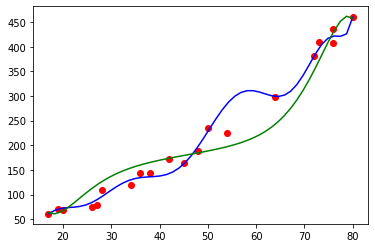

In [56]:
xs = np.linspace(x.min(),x.max()) # x values for plotting the model line
xs_poly = poly.fit_transform(scaler.transform(xs.reshape(-1,1)))

ys = model.predict(xs_poly) # get y values from predict()
regys = regmodel.predict(xs_poly) # get y values from predict()

plt.plot(x, y, 'ro')
plt.plot(xs, ys, 'b')
plt.plot(xs, regys, 'g')
plt.show()